# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
## 1) Текстовое описание набора данных

## Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from operator import itemgetter
import matplotlib.ticker as ticker
import numpy as np
import math
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns

In [2]:
data=pd.read_csv('breast-cancer.csv',sep=",")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.shape

(569, 32)

## 2) проверка на пропуски в датасете

In [5]:
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## 3) Разделим датасет на обучающую и тестовую выборку

In [6]:
BC_X_train, BC_X_test, BC_y_train, BC_y_test = train_test_split(
    data, data['diagnosis'], test_size=0.5, random_state=1)

In [7]:
del BC_X_train['diagnosis']
del BC_X_test['diagnosis']

In [8]:

#BC_X_test = BC_X_test.rename(columns={'area_mean': 'x1', 'texture_mean': 'x2'})
#BC_X_train = BC_X_train.rename(columns={'area_mean': 'x1', 'texture_mean': 'x2'})
#BC_y_train.columns = ['y_clas']
#BC_y_test.columns = ['y_clas']

In [9]:
BC_y_train

138    M
51     B
437    B
112    B
265    M
      ..
129    M
144    B
72     M
235    B
37     B
Name: diagnosis, Length: 284, dtype: object

## 4) Обучаем модель по выборке, проверяем метрики

In [10]:
from enum import Enum
class PredictionType(Enum):
    CLASSIFICATION = 1
    REGRESSION = 2

In [11]:
model = KNeighborsClassifier(n_neighbors = 7)

In [12]:
model.fit(BC_X_train, BC_y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
predictions = model.predict(BC_X_test)

In [14]:
predictions

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B

In [15]:
def accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса,
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values,
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray,
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [16]:

print_accuracy_score_for_classes(predictions, BC_y_test)

Метка 	 Accuracy
B 	 0.7101449275362319
M 	 0.5512820512820513


## 5) Валидация

In [17]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2),
                         BC_X_train, BC_y_train, cv=3)

In [18]:
scores

array([0.69473684, 0.64210526, 0.67021277])

In [19]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2),
                           BC_X_train, BC_y_train, cv=3,
                        scoring='f1_weighted')
scores, np.mean(scores)


(array([0.65115858, 0.59148872, 0.61173985]), 0.6181290505687878)

In [20]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [21]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(BC_X_train, BC_y_train)

CPU times: user 1.22 s, sys: 6.96 ms, total: 1.23 s
Wall time: 642 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [22]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00373373, 0.00320663, 0.00311279, 0.00319896, 0.00311065,
        0.00336156, 0.0033958 , 0.00310593, 0.00431914, 0.0035285 ]),
 'std_fit_time': array([7.74788994e-04, 1.74098960e-04, 8.00869265e-05, 1.53402049e-04,
        1.15966562e-04, 2.97095097e-04, 2.86036166e-04, 1.14085659e-04,
        1.40455452e-03, 5.13190940e-04]),
 'mean_score_time': array([0.00945606, 0.00780506, 0.00807824, 0.00800748, 0.00778813,
        0.00853572, 0.00927396, 0.00853844, 0.00995755, 0.0100656 ]),
 'std_score_time': array([0.00182513, 0.00015619, 0.00033995, 0.00018038, 0.0002379 ,
        0.00101837, 0.00110193, 0.00056678, 0.00181048, 0.00234316]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [23]:
clf_gs.best_params_

{'n_neighbors': 5}

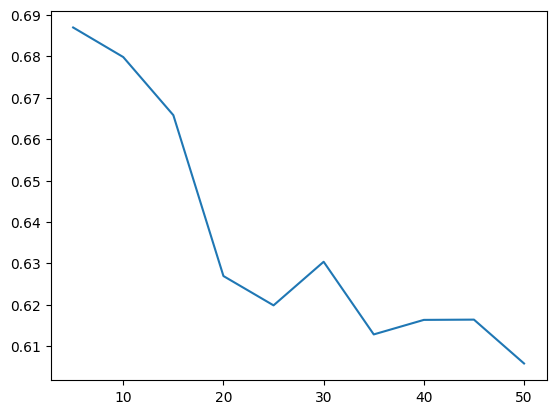

In [24]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [25]:

%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(BC_X_train, BC_y_train)

CPU times: user 1.36 s, sys: 14 ms, total: 1.37 s
Wall time: 730 ms


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

In [26]:
clf_rs.best_score_, clf_rs.best_params_


(0.6869674185463659, {'n_neighbors': 5})

In [27]:
clf_gs.best_score_, clf_gs.best_params_

(0.6869674185463659, {'n_neighbors': 5})

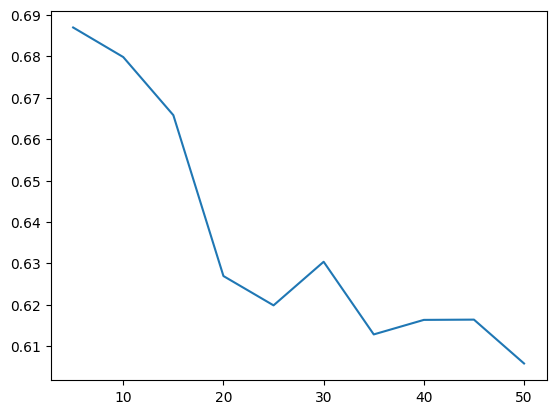

In [28]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

## 6) Сравнение метрик качества

In [29]:
print_accuracy_score_for_classes(predictions, BC_y_test)

Метка 	 Accuracy
B 	 0.7101449275362319
M 	 0.5512820512820513


In [30]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(BC_X_train, BC_y_train)
predictions = model.predict(BC_X_test)
print_accuracy_score_for_classes(predictions, BC_y_test)

Метка 	 Accuracy
B 	 0.7222222222222222
M 	 0.5517241379310345
